In [321]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [322]:
#df=pd.DataFrame()

In [323]:
#df['Feature1']=[1,2,3,4,5,6,6,7,9,9]
#df['Feature2']=[5,3,6,8,1,9,5,8,9,2]
#df['target']=[1,1,0,1,0,1,0,1,0,0]

df = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [10, 20, 30, 40, 50],
    'target': [0, 1, 0, 1, 0]
})

In [324]:
df

,Feature1,Feature2,target
0,1,10,0
1,2,20,1
2,3,30,0
3,4,40,1
4,5,50,0


In [325]:
df.shape

(5, 3)

**Showcase the relationship between Feature1,Feature2,target**

<Axes: xlabel='Feature1', ylabel='Feature2'>

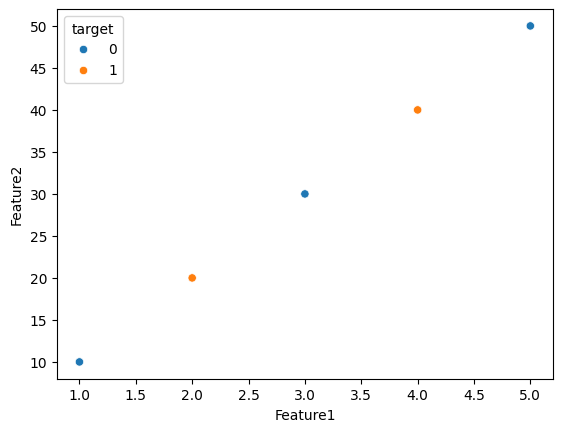

In [326]:
import seaborn as sns
sns.scatterplot(x=df['Feature1'],y=df['Feature2'],hue=df['target'])

Weight Initialization in the First iteration : 1 / the number of record(data points)

1/10 =0.1  ->Weight initialization for all the records in the first iteration

In [327]:
df['weights'] =1/df.shape[0]

In [328]:
df

,Feature1,Feature2,target,weights
0,1,10,0,0.2
1,2,20,1,0.2
2,3,30,0,0.2
3,4,40,1,0.2
4,5,50,0,0.2


In [329]:
from sklearn.tree import DecisionTreeClassifier

In [330]:
dt1=DecisionTreeClassifier(max_depth=1)

Split the Data into Input features and Target features

In [331]:
X =df.iloc[:,0:2].values
y=df.iloc[:,2].values

Model Training : M1

In [332]:
X

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40],
       [ 5, 50]])

In [333]:
y

array([0, 1, 0, 1, 0])

In [334]:
##Model Training M1

In [335]:
#Step2: Train 1st Model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [336]:
dt1

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.625, 0.5, '  False')]

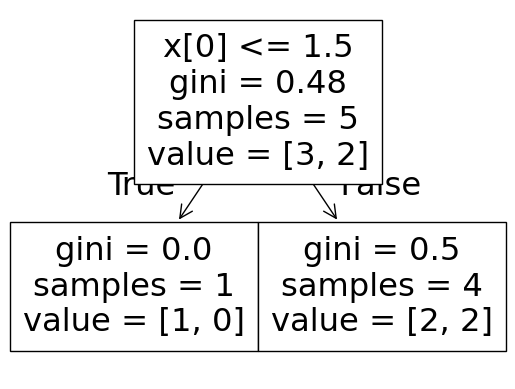

In [337]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

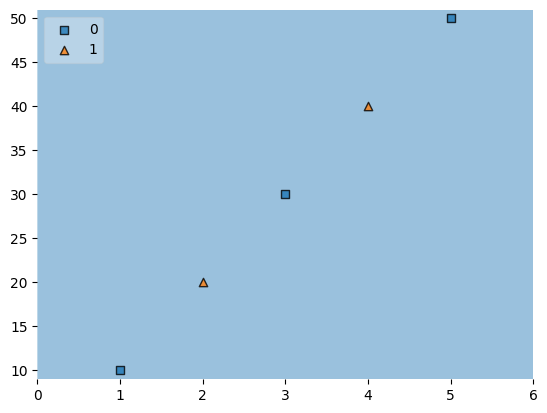

In [338]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [339]:
df['y_pred'] =dt1.predict(X)

In [340]:
df

,Feature1,Feature2,target,weights,y_pred
0,1,10,0,0.2,0
1,2,20,1,0.2,0
2,3,30,0,0.2,0
3,4,40,1,0.2,0
4,5,50,0,0.2,0


In [341]:
#Evaluate the Value of Alpha
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [342]:
#Step3 : Calculatethe Error Weight
#3 miss classified points.hence error value is 0.3 (0.1+0.1+0.1)
alpha1=calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [343]:
#Step4: Update Weights of the Correctly classified points and misclassified points
def update_weights(row,alpha=0.423):
  #correctly classified points
  if row['target'] == row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    #misclassified points
    return row['weights']*np.exp(alpha)


In [344]:
df['updated_weights'] =df.apply(update_weights,axis=1)

In [345]:
df

,Feature1,Feature2,target,weights,y_pred,updated_weights
0,1,10,0,0.2,0,0.131016
1,2,20,1,0.2,0,0.305307
2,3,30,0,0.2,0,0.131016
3,4,40,1,0.2,0,0.305307
4,5,50,0,0.2,0,0.131016


In [346]:
#Check if the addition of updated weights is equal to 1.If not Normalize the Weights
df['updated_weights'].sum()

np.float64(1.0036608982536666)

In [347]:
#To normalize the weight so that the total weights is equal to 1 : take individual weight/ summation of the weights
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [348]:
df

,Feature1,Feature2,target,weights,y_pred,updated_weights,normalized_weights
0,1,10,0,0.2,0,0.131016,0.130538
1,2,20,1,0.2,0,0.305307,0.304193
2,3,30,0,0.2,0,0.131016,0.130538
3,4,40,1,0.2,0,0.305307,0.304193
4,5,50,0,0.2,0,0.131016,0.130538


In [349]:
df['normalized_weights'].sum()

np.float64(1.0)

In [350]:
total = float(df['normalized_weights'].sum())
print(total)

1.0


In [351]:
#Lower and Upper bounds of the Normalized weights
df['cumsum_upper'] =np.cumsum(df['normalized_weights'])


In [352]:
#df['cumsum_lower'] =df['cumsum_upper'] - np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'].shift(1, fill_value=0)

In [353]:
df

,Feature1,Feature2,target,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,10,0,0.2,0,0.131016,0.130538,0.130538,0.000000
1,2,20,1,0.2,0,0.305307,0.304193,0.434731,0.130538
2,3,30,0,0.2,0,0.131016,0.130538,0.565269,0.434731
3,4,40,1,0.2,0,0.305307,0.304193,0.869462,0.565269
4,5,50,0,0.2,0,0.131016,0.130538,1.000000,0.869462


In [354]:
df.columns

Index(['Feature1', 'Feature2', 'target', 'weights', 'y_pred',
       'updated_weights', 'normalized_weights', 'cumsum_upper',
       'cumsum_lower'],
      dtype='object')

In [355]:
df[['Feature1', 'Feature2', 'target', 'weights', 'y_pred',
       'updated_weights', 'normalized_weights', 'cumsum_upper',
       'cumsum_lower']]

,Feature1,Feature2,target,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,10,0,0.2,0,0.131016,0.130538,0.130538,0.000000
1,2,20,1,0.2,0,0.305307,0.304193,0.434731,0.130538
2,3,30,0,0.2,0,0.131016,0.130538,0.565269,0.434731
3,4,40,1,0.2,0,0.305307,0.304193,0.869462,0.565269
4,5,50,0,0.2,0,0.131016,0.130538,1.000000,0.869462


ITERATION 2 : Creating a New Dataset

In [356]:
def create_new_dataset(df):
    n_samples = df.shape[0]
    # generate n random numbers at once
    rand_values = np.random.random(n_samples)

    # use np.searchsorted to find the interval index
    indices = np.searchsorted(df['cumsum_upper'].values, rand_values)

    return indices


In [357]:
#index_values =create_new_dataset(df)
index_values = create_new_dataset(df)
new_df = df.loc[index_values].reset_index(drop=True)

print(index_values[:20])

[2 1 3 1 0]


In [358]:
print(index_values[:20])

[2 1 3 1 0]


In [359]:
# Step 1: Define the columns you want to keep
cols_to_keep = ['Feature1', 'Feature2', 'target', 'weights']

# Step 2: Use .loc with your sampled indices
second_df = df.loc[index_values, cols_to_keep].reset_index(drop=True)

# Step 3: Check
print(second_df)

   Feature1  Feature2  target  weights
0         3        30       0      0.2
1         2        20       1      0.2
2         4        40       1      0.2
3         2        20       1      0.2
4         1        10       0      0.2


In [360]:
dt2=DecisionTreeClassifier(max_depth=1)

In [361]:
X =second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [362]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 15.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.5, '  False')]

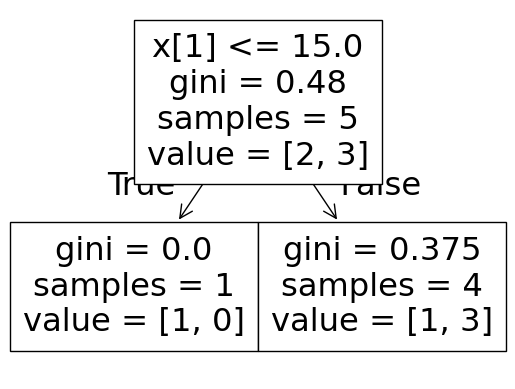

In [363]:
from sklearn.tree import plot_tree
plot_tree(dt2)



<Axes: >

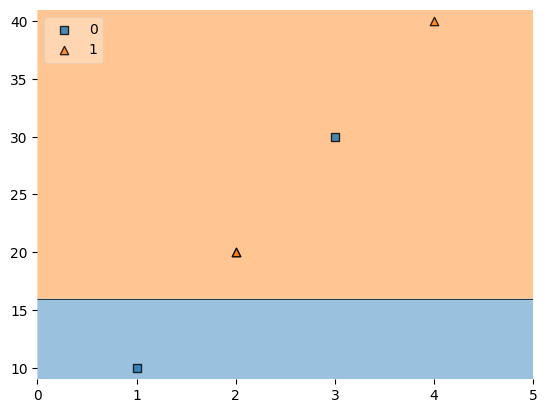

In [364]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [365]:
second_df['y_pred'] =dt2.predict(X)

In [366]:
second_df

,Feature1,Feature2,target,weights,y_pred
0,3,30,0,0.2,1
1,2,20,1,0.2,1
2,4,40,1,0.2,1
3,2,20,1,0.2,1
4,1,10,0,0.2,0


In [367]:
alpha2=calculate_model_weight(0.1)
alpha2

np.float64(1.0986122886681098)

In [368]:
def update_weights(row,alpha=1.09):
  #correctly classified points
  if row['target'] == row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    #misclassified points
    return row['weights']*np.exp(alpha)




In [369]:
second_df['updated_weights'] =second_df.apply(update_weights,axis=1)

In [370]:
second_df

,Feature1,Feature2,target,weights,y_pred,updated_weights
0,3,30,0,0.2,1,0.594855
1,2,20,1,0.2,1,0.067243
2,4,40,1,0.2,1,0.067243
3,2,20,1,0.2,1,0.067243
4,1,10,0,0.2,0,0.067243


In [371]:
second_df['updated_weights'].sum()

np.float64(0.863828009478)

In [372]:
second_df['normalized_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [373]:
second_df['normalized_weights'].sum()

np.float64(0.9999999999999999)

In [374]:

second_df['cumsum_upper'] =np.cumsum(second_df['normalized_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'].shift(1, fill_value=0)

In [375]:
second_df

,Feature1,Feature2,target,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,3,30,0,0.2,1,0.594855,0.688626,0.688626,0.000000
1,2,20,1,0.2,1,0.067243,0.077843,0.766470,0.688626
2,4,40,1,0.2,1,0.067243,0.077843,0.844313,0.766470
3,2,20,1,0.2,1,0.067243,0.077843,0.922157,0.844313
4,1,10,0,0.2,0,0.067243,0.077843,1.000000,0.922157


In [376]:
second_df[['Feature1', 'Feature2', 'target', 'weights', 'y_pred',
       'updated_weights', 'normalized_weights', 'cumsum_upper',
       'cumsum_lower']]

,Feature1,Feature2,target,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,3,30,0,0.2,1,0.594855,0.688626,0.688626,0.000000
1,2,20,1,0.2,1,0.067243,0.077843,0.766470,0.688626
2,4,40,1,0.2,1,0.067243,0.077843,0.844313,0.766470
3,2,20,1,0.2,1,0.067243,0.077843,0.922157,0.844313
4,1,10,0,0.2,0,0.067243,0.077843,1.000000,0.922157


In [377]:
index_values = create_new_dataset(second_df)
new_df1 = second_df.loc[index_values].reset_index(drop=True)

print(index_values[:20])

[0 4 0 0 0]


In [378]:
# Sample indices for third dataset from the original df
third_index_values = create_new_dataset(df)

# Keep only columns up to 'weights'
cols_to_keep = ['Feature1', 'Feature2', 'target', 'weights']
third_df = df.loc[third_index_values, cols_to_keep].reset_index(drop=True)

# Check
print(third_index_values[:20])
print(third_df.head())

[1 4 1 1 1]
   Feature1  Feature2  target  weights
0         2        20       1      0.2
1         5        50       0      0.2
2         2        20       1      0.2
3         2        20       1      0.2
4         2        20       1      0.2


In [380]:
dt3=DecisionTreeClassifier(max_depth=1)

In [381]:
X =third_df.iloc[:,0:2].values
y=third_df.iloc[:,2].values


In [382]:

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 35.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.5, '  False')]

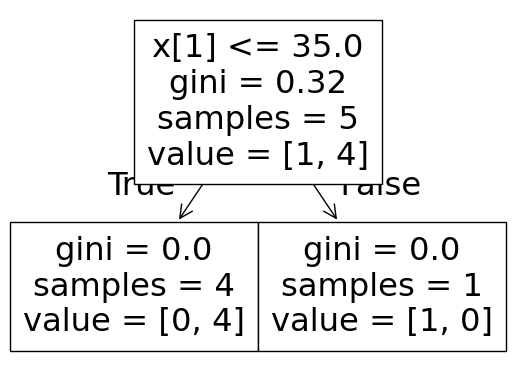

In [383]:
from sklearn.tree import plot_tree
plot_tree(dt3)

<Axes: >

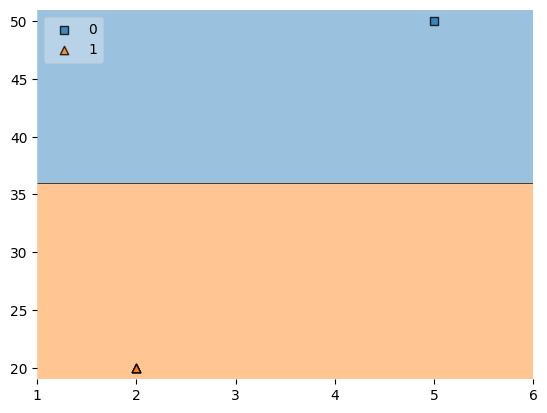

In [384]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [385]:
third_df['y_pred'] =dt3.predict(X)

In [386]:
third_df

,Feature1,Feature2,target,weights,y_pred
0,2,20,1,0.2,1
1,5,50,0,0.2,0
2,2,20,1,0.2,1
3,2,20,1,0.2,1
4,2,20,1,0.2,1
